## Processo de calibração de uma câmera em um padrão 3D

O sistema de referência do padrão 3D é tomado temporariamente como sistema de referência do espaço-objeto para fins de calibração da câmera.


<img src="data/3D-pattern.png">

Em uma imagem como esta, temos vários pontos no espaço objeto $[X^{(i)} Y^{(i)} Z^{(i)}]$, os quais podemos adquirir suas coordenadas em pixel no espaço imagem $[u^{(i)} v^{(i)}]$. Neste caso, teremos pontos no espaço objeto na escala do padrão quadriculado, mas se soubermos o tamanho de cada quadrado em mm podemos usar esta informação, Ex. digamos que o quadrado tem 30mm, as cordenadas da Fig. acima ((0,1,1), (0,2,1)) seriam ((0,30,30), (0,60,30)).

Após a coleta de um conjunto $[u^{(i)} v^{(i)} X^{(i)} Y^{(i)} Z^{(i)}]$ para $i=1,...,n$ realizamos o ajustamento. Começamos desenvolvendo a equação da transformação de um ponto no espaço-objeto para o espaço-imagem:

$$Z
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}=
\underbrace{
        \underbrace{
            \begin{bmatrix}
                f_x & 0 & c_x & 0 \\
                0 & f_y & c_y & 0 \\
                0 & 0 & 1 & 0
            \end{bmatrix}
        }_{Intrinsic \ parameters \ [K_{3\times 3}|0]}
        \underbrace{
            \begin{bmatrix}
                R_{3 \times 3} & t_{3\times 1} \\
                0_{1 \times 3} & 1 
            \end{bmatrix}
        }_{Extrinsic \ parameters \ T_{4\times 4}}
}_{P_{3\times 4}}
\begin{bmatrix}
X \\
Y \\
Z \\
1
\end{bmatrix}  \ \ \ (1)
$$

$$
Z\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix}
\begin{bmatrix}
    X \\
    Y \\
    Z \\
    1
\end{bmatrix} =
\begin{bmatrix}
    p_{11}X + p_{12}Y + p_{13}Z + p_{14} \\
    p_{21}X + p_{22}Y + p_{23}Z + p_{24} \\
    p_{31}X + p_{32}Y + p_{33}Z + p_{34}
\end{bmatrix} \\
$$
$$
u = \frac{p_{11}X + p_{12}Y + p_{13}Z + p_{14}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}
$$
$$
v = \frac{p_{21}X + p_{22}Y + p_{23}Z + p_{24}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}
$$
$$
p_{11}X + p_{12}Y + p_{13}Z + p_{14} - up_{31}X - u p_{32}Y - u p_{33}Z - u p_{34} = 0
$$
$$
p_{21}X + p_{22}Y + p_{23}Z + p_{24} - vp_{31}X - v p_{32}Y - v p_{33}Z - v p_{34} = 0
$$

Transformando em forma matricial temos:

$$
\begin{bmatrix}
X & Y & Z & 1 & 0   & 0   & 0   & 0 & -uX & -uY & -uZ & -u \\
0   &  0  & 0   & 0 & X & Y & Z & 1 & -vX & -vY & -vZ & -v 
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0
$$

Para o nosso conjunto de $n$ pontos do espaço-objeto com suas respectivas correspondênicas no espaço-imagem, temos:

$$
\begin{bmatrix}
X^{(1)} & Y^{(1)} & Z^{(1)} & 1 & 0   & 0   & 0   & 0 & -u^{(1)}X^{(1)} & -u^{(1)}Y^{(1)} & -u^{(1)}Z^{(1)} & -u^{(1)} \\
0   &  0  & 0   & 0 & X^{(1)} & Y^{(1)} & Z^{(1)} & 1 & -v^{(1)}X^{(1)} & -v^{(1)}Y^{(1)} & -v^{(1)}Z^{(1)} & -v^{(1)} \\
\vdots \\
X^{(n)} & Y^{(n)} & Z^{(n)} & 1 & 0   & 0   & 0   & 0 & -u^{(n)}X^{(n)} & -u^{(n)}Y^{(n)} & -u^{(n)}Z_w^{(n)} & -u^{(n)} \\
0   &  0  & 0   & 0 & X^{(n)} & Y^{(n)} & Z^{(n)} & 1 & -v^{(n)}X^{(n)} & -v^{(n)}Y^{(n)} & -v^{(n)}Z^{(n)} & -v^{(n)} \\
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0 
$$

$$
\begin{bmatrix}A\end{bmatrix}_{2n \ \times \ 12}\ \begin{bmatrix}\mathbf{p}\end{bmatrix}_{12 \ \times\ 1}=0
$$

Solucionado com um conjunto mínimo de 6 amostragens $[u^{(i)} v^{(i)} X^{(i)} Y^{(i)} Z^{(i)}]$ pelo método de estimativa por mínimos quadrado com restrição, ou seja, o novo problema se torna:

$$
min (||A\mathbf{p}||^2) \ sujeito \ a \ ||\mathbf{p}||=1
$$

Ou seja:

$$
min (\mathbf{p}^TA^TA\mathbf{p}) \ sujeito  \ a \ \mathbf{p}^T\mathbf{p}=1
$$

É definida uma função de perda conveniente para ser minimizada:

$$
min = \mathbf{p}^TA^TA\mathbf{p} - \lambda(\mathbf{p}^T\mathbf{p} -1)
$$

Tomando-se a derivada com respeito a $\mathbf{p}$, temos:

$$
0 = 2A^TA\mathbf{p} - 2\lambda \mathbf{p}
$$

Que é equivalente ao probelma dos autovalores:

$$
A^TA\mathbf{p} = \lambda \mathbf{p}
$$

A solução de $\mathbf{p}$ será o autovetor correspondete ao menor autovalor de $A^TA$.



### Fatoração de $P$ em $K, R$ e $t$ 

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
    R_{3 \times 3} & t_{3\times 1} \\
    0_{1 \times 3} & 1 
\end{bmatrix}
$$

O primeiro bloco $3 \times 3$ de $P$ é:

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    R\\
\end{bmatrix} = KR
$$

Onde $K$ (a matriz da câmera, ou a matriz intrínseca) é uma matriz triangular superior e $R$ (matriz de rotação) é uma matriz ortonormal. Com isso, utilizamos a *fatorização QR* para calcular $K$ e $R$.

Pode-se ir além e obter $t$, pois o bloco $3 \times 1$ final de $P$ é:

$$
\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    t_x \\
    t_y \\
    t_z
\end{bmatrix} = Kt
$$

Assim, podemos calcular $t$ da seguinte forma:

$$
 t = K^{-1}\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix}
$$


### Exemplo

Considere o padrão 3D em fomato de cubos empilhados, cada cubinho tem aresta 1.

In [5]:
import open3d as o3d
import numpy as np
import copy

colors = {
    'white':  [1.0, 1.0, 1.0],
    'yellow': [1.0, 1.0, 0.0],
    'red':    [1.0, 0.0, 0.0],
    'orange': [1.0, 0.5, 0.0],
    'blue':   [0.0, 0.0, 1.0],
    'green':  [0.0, 1.0, 0.0],
    'black':  [0.0, 0.0, 0.0]
}

points = [
    [0, 0, 0], # P0 z = 0, face azul vermelha
    [1, 0, 0], # P1
    [2, 0, 0], # P2
    [2, 1, 0], # P3
    [1, 1, 0], # P4
    [0, 1, 0], # P5
    [0, 2, 0], # P6
    [1, 2, 0], # P7
    [2, 2, 0], # P8
    [0, 0, 1], # P9
    [1, 0, 1], # P10
    [2, 0, 1], # P11
    [2, 1, 1], # P12
    [1, 1, 1], # P13 interno
    [0, 1, 1], # P14
    [0, 2, 1], # P15
    [1, 2, 1], # P16
    [2, 2, 1], # P17
    [0, 0, 2], # P18 z = 2, face amarelo e verde
    [1, 0, 2], # P19
    [2, 0, 2], # P20
    [2, 1, 2], # P21
    [1, 1, 2], # P22
    [0, 1, 2], # P23
    [0, 2, 2], # P24
    [1, 2, 2], # P25
    [2, 2, 2], # P26
]

pcd = o3d.geometry.PointCloud()
point_cloud = np.asarray(np.array(points))
pcd.points = o3d.utility.Vector3dVector(point_cloud)
pcd.colors = o3d.utility.Vector3dVector([[0,0,0] for i in range(len(pcd.points))])

##### Gerar o volume do cubo para ofuscar os pontos atrás do cubo
def create_box(tx,ty,tz, color=colors["white"]):
    mesh_box = o3d.geometry.TriangleMesh.create_box(width=1,
                                                    height=1,
                                                    depth=1)
    mesh_box.compute_vertex_normals()
    mesh_box.compute_triangle_normals()

    # Get triangle data
    triangles = np.asarray(mesh_box.triangles)
    vertices = np.asarray(mesh_box.vertices)
    normals = np.asarray(mesh_box.triangle_normals)

    # Expand: one triangle = three new unique vertices
    new_vertices = []
    new_triangles = []
    new_colors = []

    for i, tri in enumerate(triangles):
        for j in range(3):
            new_vertices.append(vertices[tri[j]])
            new_colors.append(color)  # normalize [-1,1] to [0,1]
        new_triangles.append([3*i, 3*i + 1, 3*i + 2])

    #### Create new mesh with duplicated vertices
    colored_mesh = o3d.geometry.TriangleMesh()
    colored_mesh.vertices = o3d.utility.Vector3dVector(new_vertices)
    colored_mesh.triangles = o3d.utility.Vector3iVector(new_triangles)
    colored_mesh.vertex_colors = o3d.utility.Vector3dVector(new_colors)

    colored_mesh_translated = copy.deepcopy(colored_mesh).translate((tx, ty, tz))
    return colored_mesh_translated

cube1 = create_box(0,0,0, colors["red"])
cube2 = create_box(0,1,0)
cube3 = create_box(0,1,1, colors["yellow"])
cube4 = create_box(1,1,1)
cube5 = create_box(1,0,0)
cube6 = create_box(1,1,0, colors["blue"])
cube7 = create_box(0,0,1)
cube8 = create_box(1,0,1, colors["green"])

#### Eixos X(red arrow), Y(green arrow), Z(blue arrow)
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame( size=0.4, origin=[0, 0, 0])

o3d.visualization.draw_geometries([pcd, cube1, cube2, cube3, cube4, cube5, 
                                   cube6, cube7, cube8, mesh_frame] ,
                                   width=1024, height=768, zoom=1, mesh_show_wireframe =True )

Nesta câmera simulada, não precisa-se modelar distorções. Podemos usar diretamente o ajuste de $P$ e fatorá-lo em $K, R$ e $t$. Para isso foi retirada uma fotografia:

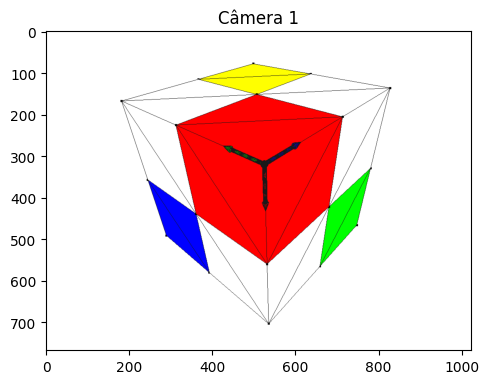

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img = mpimg.imread(f'aux_data/ScreenCapture_3Dpattern.png')
    
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 1, figsize=(5,8))

# Display image
axes.imshow(img)
axes.set_title(f'Câmera {1}')

# Adjust layout
plt.tight_layout()
plt.show()

Onde observa-se $n=19$ pontos no espaço objeto de coordenadas conhecidas.

Já sabemos a priori o resultado que desejamos chegar:

In [53]:
import json
import numpy as np

# Load the json
camera = json.load(open(f"aux_data/ScreenCamera_3Dpattern.json"))

# Load the T
T = np.array(camera['extrinsic'], dtype=float).reshape(4,4).T
T = T[:3,:] # remove a última linha de T

# Load K
K = np.array(camera['intrinsic']['intrinsic_matrix'], dtype=float).reshape(3,3).T

# Calculate P
P = K @ T

# show T
print(f"T:\n", T)

# show K
print(f"K:\n", K)

# show P
print(f"P:\n", P)

# Teste de projeção do origem P0 = [0,0,0]
p = P @ np.array([0,0,0,1])
origem = p/p[-1]
print(f"Coordenada da origem P0 projetada:\n", np.round(origem[:2]))

T:
 [[ 0.03476902 -0.73576626  0.67634246  0.03457177]
 [ 0.80117304 -0.3840305  -0.45895787 -0.16866854]
 [ 0.59742185  0.55782486  0.57612373  1.77597073]]
K:
 [[665.10751011   0.         511.5       ]
 [  0.         665.10751011 383.5       ]
 [  0.           0.           1.        ]]
P:
 [[ 328.70641335 -204.03625202  744.52773735  931.40297085]
 [ 761.97748861  -41.49573891  -84.31287274  568.90206137]
 [   0.59742185    0.55782486    0.57612373    1.77597073]]
Coordenada da origem P0 projetada:
 [524. 320.]


As coordenadas dos pixels correspondentes $\mathbf{u_{i}}$ para $i=0,...,18$:

In [21]:
n = 19

X_i = np.zeros((n,3))
X_i[0] = [0, 0, 0] # P0 origem
X_i[1] = [0, 0, 1] # P1
X_i[2] = [1, 0, 1] # P2 ligação vermelho-verde
X_i[3] = [1, 0, 0] # P3
X_i[4] = [1, 1, 0] # P4 ligação vermelho-azul
X_i[5] = [0, 1, 0] # P5
X_i[6] = [0, 1, 1] # P6 ligação vermelho-amarelo
X_i[7] = [0, 2, 0] # P7 ponto mais esquerdo
X_i[8] = [0, 2, 1] # P8
X_i[9] = [0, 2, 2] # P9 ponto mais superior
X_i[10] = [0, 1, 2] # P10
X_i[11] = [0, 0, 2] # P11 ponto mais direito
X_i[12] = [1, 0, 2] # P12
X_i[13] = [2, 0, 2] # P13
X_i[14] = [2, 0, 1] # P14
X_i[15] = [2, 0, 0] # P15 ponto mais inferior
X_i[16] = [2, 1, 0] # P16
X_i[17] = [2, 2, 0] # P17
X_i[18] = [1, 2, 0] # P18

u_i = np.zeros((n,2))
u_i[0] = [525,320]  # P0 origem
u_i[1] = [713,206]
u_i[2] = [680,423]  # P2 ligação vermelho-verde
u_i[3] = [531,561]
u_i[4] = [360,440]  # P4 ligação vermelho-azul
u_i[5] = [312,226]
u_i[6] = [506,152]  # P6 ligação vermelho-amarelo
u_i[7] = [181,168]  # P7 ponto mais esquerdo
u_i[8] = [367,115]
u_i[9] = [498,78]   # P9 ponto mais superior
u_i[10] = [636,103]
u_i[11] = [827,137] # P11 ponto mais direito
u_i[12] = [780,330]
u_i[13] = [747,467]
u_i[14] = [658,566]
u_i[15] = [535,704] # P15 ponto mais inferior
u_i[16] = [392,581]
u_i[17] = [289,492]
u_i[18] = [244,358]


Ajustamento:

In [26]:
A = []
for i in range(0,19):
    X, Y, Z = X_i[i]
    u, v = u_i[i]
    if len(A) == 0:
        A = np.array([[X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u],
                      [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]], dtype=float)
    else: 
        aux = np.array([[X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u],
                        [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]], dtype=float)
        A = np.vstack((A, aux))
print("A.shape", A.shape, f" / Esperado (2nx12) = {2*n}x{12}")

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

# Find the index of the minimum eigenvalue
min_index = np.argmin(eigenvalues)

# Get the minimum eigenvalue and corresponding eigenvector
min_eigenvalue = eigenvalues[min_index]
min_eigenvector = eigenvectors[:, min_index]

# Remove the imaginary part if exists
min_eigenvector = np.real(min_eigenvector)

P_calc = min_eigenvector.reshape((3,4))
# show P Calc
print(f"P_calc:\n", P_calc)

A.shape (38, 12)  / Esperado (2nx12) = 38x12
P_calc:
 [[-2.08112885e-01  1.29988856e-01 -4.72071944e-01 -5.91363000e-01]
 [-4.82993749e-01  2.70144882e-02  5.34448101e-02 -3.61052689e-01]
 [-3.78605491e-04 -3.51891585e-04 -3.64761751e-04 -1.12698173e-03]]


Fatoração de $P$

In [60]:
import scipy
np.set_printoptions(suppress=True)

# Compute RQ decomposition of a matrix.
# Calculate the decomposition A = R Q where Q is unitary/orthogonal and R upper triangular.
K_calc, R_calc = scipy.linalg.rq(P_calc[:,:3])
print(K_calc)
# Teste de projeção do origem P0 = [0,0,0]
p = K_calc @ T @ np.array([0,0,0,1])
origem = p/p[-1]
print(f"Coordenada da origem P0 projetada:\n", np.round(origem[:2]))

# Normalização pelo elemento K[2,2]
K_calc = K_calc/K_calc[2,2]
print(K_calc)
p = K_calc @ T @ np.array([0,0,0,1])
origem = p/p[-1]
print(f"Coordenada da origem P0 projetada:\n", np.round(origem[:2]))

# A decomposition QR não garante que a diagonal de K_calc seja positivo, o que é necessário algebricamante
# Para isso para cada elemento negativo na diagonal de K_calc, multiplica-se esta coluna por -1 e 
# para equilibrar a linha respectiva de R_calc por -1.
def adjust_K_R_signs(K, R):
    for i in range(3):
        if K[i, i] < 0:
            K[:, i] *= -1
            R[i, :] *= -1
    return K, R
K_calc, R_calc = adjust_K_R_signs(K_calc, R_calc)
print(K_calc)
p = K_calc @ T @ np.array([0,0,0,1])
origem = p/p[-1]
print(f"Coordenada da origem P0 projetada:\n", np.round(origem[:2]))

print(f"\nK_calculado:\n", K_calc)
print(f"\nK_esperado:\n", K)

[[ 0.42166909  0.00025236  0.32443044]
 [ 0.         -0.42156492  0.24321207]
 [ 0.          0.          0.00063263]]
Coordenada da origem P0 projetada:
 [526. 448.]
[[ 666.53331941    0.39891033  512.82795182]
 [   0.         -666.36865792  384.44588053]
 [   0.            0.            1.        ]]
Coordenada da origem P0 projetada:
 [526. 448.]
[[666.53331941  -0.39891033 512.82795182]
 [  0.         666.36865792 384.44588053]
 [  0.          -0.           1.        ]]

K_calculado:
 [[666.53331941  -0.39891033 512.82795182]
 [  0.         666.36865792 384.44588053]
 [  0.          -0.           1.        ]]

K_esperado:
 [[665.10751011   0.         511.5       ]
 [  0.         665.10751011 383.5       ]
 [  0.           0.           1.        ]]
Coordenada da origem P0 projetada:
 [526. 321.]


Observações:

- Sendo $S$ uma matriz diagonal com os sinais da diagonal de $K$, ou seja, $S = diag(sign(K_{11}),sign(K_{22}),sign(K_{33}))$. Podemos corrigir os sinais de $K$ lembrando que $KR = (KS)(SR)$, assim jogando para $R$ a compensação;
- NO ENTANTO ESSA OPEAÇÃO É DESNECESSÁRIA, pois devido a natureza homogênea das coordenadas do pixel obtida, existem várias versões de $K$ (mesmo com sinal trocado), que produzem o mesmo resultado. Perceba acima, que desde antes da normalização de $K$ pelo elemento $K_{33}$, o resultado da projeção do ponto no espaço-objeto [0, 0, 0] na imagem continua o mesmo [526, 321].